<a href="https://colab.research.google.com/github/MargaritaGorbunova/Artificial_Intelligence_Methods_Coursework/blob/main/Lab_05_MNIST_Classification/mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка и подготовка данных

In [2]:
# Загрузка данных MNIST
(x, y), (x_test, y_test) = mnist.load_data()

print(f"Оригинальные размеры:")
print(f"x_train: {x.shape}, y_train: {y.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

# Преобразование в формат (28, 28, 1) и нормализация
x = np.expand_dims(x, axis=-1) / 255.0
x_test = np.expand_dims(x_test, axis=-1) / 255.0

print(f"\nПосле преобразования:")
print(f"x: {x.shape}, x_test: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Оригинальные размеры:
x_train: (60000, 28, 28), y_train: (60000,)
x_test: (10000, 28, 28), y_test: (10000,)

После преобразования:
x: (60000, 28, 28, 1), x_test: (10000, 28, 28, 1)


Разделение данных

In [3]:
# Разделение данных на обучающую и тестовую выборки
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

print("Разделение данных:")
print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_val: {x_val.shape}, y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}")

Разделение данных:
x_train: (48000, 28, 28, 1), y_train: (48000,)
x_val: (12000, 28, 28, 1), y_val: (12000,)
x_test: (10000, 28, 28, 1), y_test: (10000,)


Создание генератора данных

In [4]:
# Настройка аугментации данных
datagen = ImageDataGenerator(
    rotation_range=20,      # Поворот на случайный угол от -20 до 20 градусов
    width_shift_range=0.2,  # Сдвиг по ширине
    height_shift_range=0.2, # Сдвиг по высоте
    shear_range=0.2,        # Искажение
    zoom_range=0.2,         # Масштабирование
    horizontal_flip=True,   # Горизонтальный поворот
    fill_mode='nearest'     # Заполнение пустых пикселей
)

print("Генератор данных создан с параметрами аугментации:")
print(f"rotation_range: 20")
print(f"width_shift_range: 0.2")
print(f"height_shift_range: 0.2")
print(f"shear_range: 0.2")
print(f"zoom_range: 0.2")
print(f"horizontal_flip: True")

Генератор данных создан с параметрами аугментации:
rotation_range: 20
width_shift_range: 0.2
height_shift_range: 0.2
shear_range: 0.2
zoom_range: 0.2
horizontal_flip: True


Создание модели CNN

In [5]:
# Создание последовательной модели
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 классов для цифр 0-9
])

print("Архитектура модели:")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Архитектура модели:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Компиляция модели

In [6]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Модель скомпилирована:")
print(f"Оптимизатор: adam")
print(f"Функция потерь: sparse_categorical_crossentropy")
print(f"Метрики: accuracy")

Модель скомпилирована:
Оптимизатор: adam
Функция потерь: sparse_categorical_crossentropy
Метрики: accuracy


Обучение модели

In [7]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=5,
    validation_data=(x_val, y_val)
)

print("Обучение завершено")
print(f"Количество эпох: 5")
print(f"Размер батча: 32")

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.5632 - loss: 1.2545 - val_accuracy: 0.8849 - val_loss: 0.3421
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8520 - loss: 0.4615 - val_accuracy: 0.9460 - val_loss: 0.1779
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8931 - loss: 0.3368 - val_accuracy: 0.9605 - val_loss: 0.1276
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9105 - loss: 0.2828 - val_accuracy: 0.9435 - val_loss: 0.1781
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9223 - loss: 0.2410 - val_accuracy: 0.9622 - val_loss: 0.1146
Обучение завершено
Количество эпох: 5
Размер батча: 32


Оценка модели на тестовых данных

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Оценка на тестовых данных:")
print(f"Потери (loss): {test_loss:.4f}")
print(f"Точность (accuracy): {test_acc * 100:.2f}%")

Оценка на тестовых данных:
Потери (loss): 0.1045
Точность (accuracy): 96.27%


Визуализация обучения

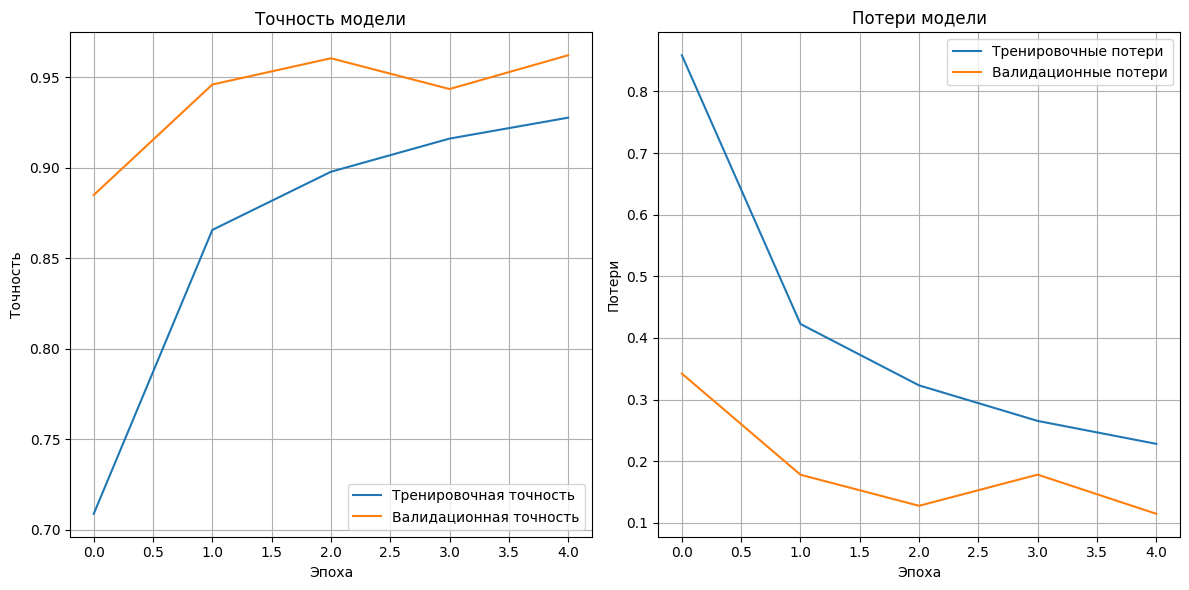

In [9]:
plt.figure(figsize=(12, 6))

# Точность
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Тренировочная точность')
plt.plot(history.history['val_accuracy'], label='Валидационная точность')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True)

# Потери
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Тренировочные потери')
plt.plot(history.history['val_loss'], label='Валидационные потери')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Матрица ошибок

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


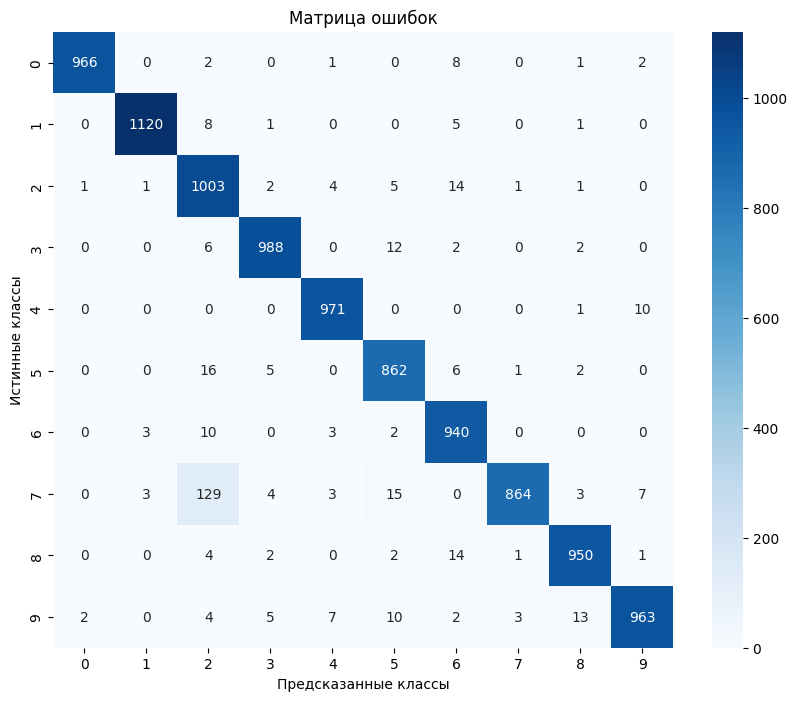

Правильно классифицировано: 9627 из 10000 (96.27%)
Ошибок: 373


In [10]:
# Предсказания на тестовой выборке
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Создание матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

# Статистика по матрице ошибок
total_correct = np.trace(conf_matrix)
total_samples = np.sum(conf_matrix)
print(f"Правильно классифицировано: {total_correct} из {total_samples} ({total_correct/total_samples*100:.2f}%)")
print(f"Ошибок: {total_samples - total_correct}")

Функция для предсказания пользовательских изображений

In [11]:
def predict_custom_image(image_path):
    """
    Функция для предсказания класса на пользовательском изображении

    Аргументы:
    image_path: путь к изображению
    """
    try:
        # Загрузка и обработка изображения
        img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
        img_array = image.img_to_array(img) / 255.0  # нормализация
        img_array = np.expand_dims(img_array, axis=0)

        # Предсказание
        pred = model.predict(img_array, verbose=0)
        predicted_class = np.argmax(pred)
        confidence = np.max(pred) * 100

        # Визуализация
        plt.figure(figsize=(6, 6))
        plt.imshow(img_array[0, :, :, 0], cmap='gray')
        plt.title(f'Предсказанный класс: {predicted_class}\nУверенность: {confidence:.1f}%')
        plt.axis('off')
        plt.show()

        print(f"Изображение: {image_path}")
        print(f"Предсказанный класс: {predicted_class}")
        print(f"Уверенность: {confidence:.1f}%")
        print("\nРаспределение вероятностей по классам:")
        for i, prob in enumerate(pred[0]):
            print(f"  Класс {i}: {prob*100:.2f}%")

    except Exception as e:
        print(f"Ошибка при обработке изображения: {e}")

Примеры предсказаний на тестовых данных

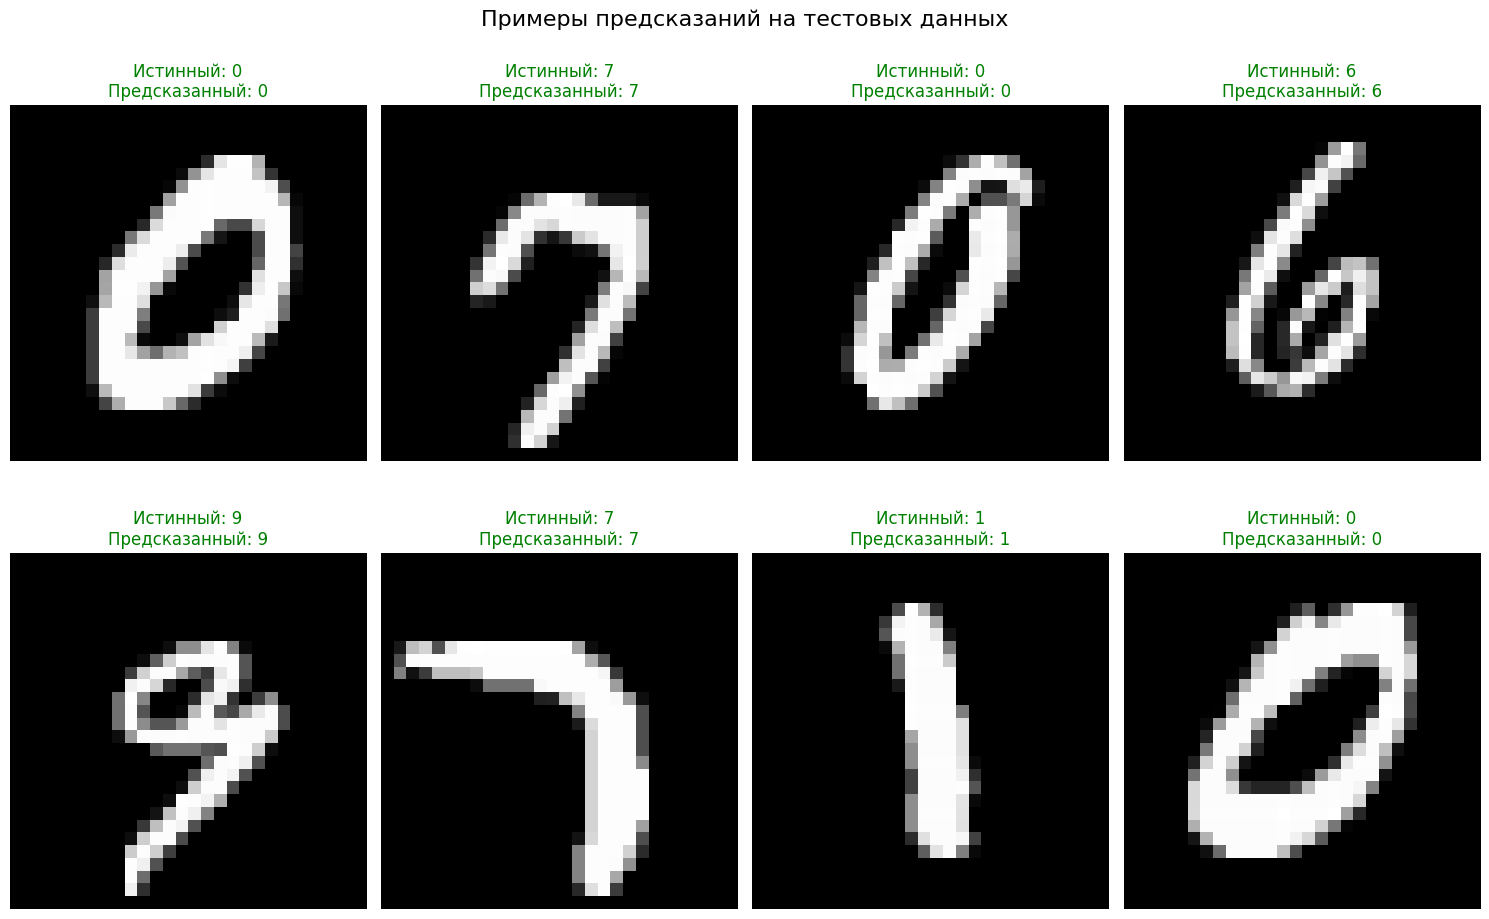

In [12]:
# Выбор случайных примеров для демонстрации
num_examples = 8
random_indices = np.random.choice(len(x_test), num_examples, replace=False)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 4, i + 1)

    # Отображение изображения
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')

    # Получение предсказания
    img_array = x_test[idx].reshape(1, 28, 28, 1)
    pred = model.predict(img_array, verbose=0)
    pred_class = np.argmax(pred)
    true_class = y_test[idx]

    # Цвет текста: зеленый если правильно, красный если неправильно
    color = 'green' if pred_class == true_class else 'red'

    plt.title(f'Истинный: {true_class}\nПредсказанный: {pred_class}', color=color)
    plt.axis('off')

plt.suptitle('Примеры предсказаний на тестовых данных', fontsize=16)
plt.tight_layout()
plt.show()

Итоговый отчет

In [13]:
print("=" * 60)
print("ИТОГОВЫЙ ОТЧЕТ: КЛАССИФИКАЦИЯ ЦИФР MNIST")
print("=" * 60)

# Основные метрики
print("\n1. ОСНОВНЫЕ МЕТРИКИ:")
print(f"   Точность на тесте: {test_acc * 100:.2f}%")
print(f"   Потери на тесте: {test_loss:.4f}")
print(f"   Эпох обучения: {len(history.history['loss'])}")

# Статистика данных
print("\n2. СТАТИСТИКА ДАННЫХ:")
print(f"   Обучающих изображений: {len(x_train)}")
print(f"   Валидационных изображений: {len(x_val)}")
print(f"   Тестовых изображений: {len(x_test)}")
print(f"   Размер изображения: 28×28 пикселей")
print(f"   Классов: 10 (цифры 0-9)")

# Параметры модели
print("\n3. ПАРАМЕТРЫ МОДЕЛИ:")
print(f"   Всего параметров: {model.count_params():,}")
print(f"   Архитектура: 2 сверточных слоя + 2 полносвязных")
print(f"   Аугментация: поворот, сдвиг, искажение, масштабирование")

# Анализ результатов
print("\n4. АНАЛИЗ РЕЗУЛЬТАТОВ:")
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overfit_gap = (final_train_acc - final_val_acc) * 100
print(f"   Финальная точность обучения: {final_train_acc*100:.2f}%")
print(f"   Финальная точность валидации: {final_val_acc*100:.2f}%")
print(f"   Разрыв обучения-валидации: {overfit_gap:.2f}%")
print(f"   Переобучение: {'минимальное' if overfit_gap < 5 else 'умеренное'}")

print("\n" + "=" * 60)

ИТОГОВЫЙ ОТЧЕТ: КЛАССИФИКАЦИЯ ЦИФР MNIST

1. ОСНОВНЫЕ МЕТРИКИ:
   Точность на тесте: 96.27%
   Потери на тесте: 0.1045
   Эпох обучения: 5

2. СТАТИСТИКА ДАННЫХ:
   Обучающих изображений: 48000
   Валидационных изображений: 12000
   Тестовых изображений: 10000
   Размер изображения: 28×28 пикселей
   Классов: 10 (цифры 0-9)

3. ПАРАМЕТРЫ МОДЕЛИ:
   Всего параметров: 225,034
   Архитектура: 2 сверточных слоя + 2 полносвязных
   Аугментация: поворот, сдвиг, искажение, масштабирование

4. АНАЛИЗ РЕЗУЛЬТАТОВ:
   Финальная точность обучения: 92.77%
   Финальная точность валидации: 96.22%
   Разрыв обучения-валидации: -3.45%
   Переобучение: минимальное

